In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

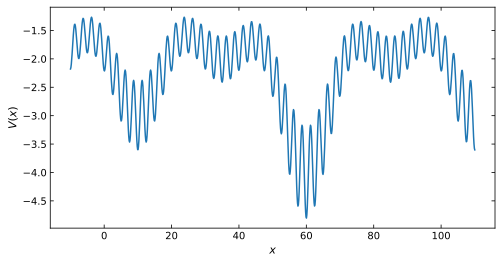

In [2]:
# First plot the potential
def potential(x):
    return (-1  -np.exp(-((x+15)/10)**2) \
              -2*np.exp(-((x-10)/10)**2) + \
                -np.exp(-((x-35)/10)**2) \
              -3*np.exp(-((x-60)/10)**2) \
                -np.exp(-((x-85)/10)**2)\
              -2*np.exp(-((x-110)/10)**2) \
              ) * \
            (1+1/5*np.cos(2*np.pi/2.5*x))

xs = np.linspace(-10, 110, 1000)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xs, potential(xs))
ax.set(xlabel=r"$x$", ylabel=r"$V(x)$")

fig.savefig('ex11_fig1.png')

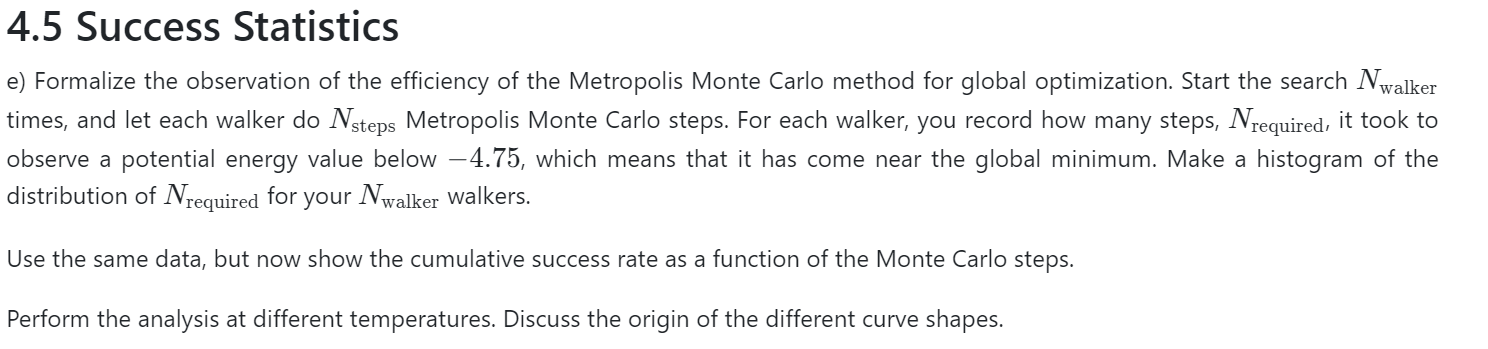

In [3]:
# Try again
class Atom:
    def __init__(self, potential, x0=0, kT=1, xmin=-10, xmax=110):
        self.potential = potential
        self.x0 = x0
        self.kT = kT
        self.xmin = xmin
        self.xmax = xmax
        self.xs = [x0]
        self.Vs = [potential(x0)]
    
    def step(self):
        x_old = self.xs[-1]
        V_old = self.Vs[-1]

        x_new = x_old + np.cos(np.random.uniform(0, 2*np.pi))
        V_new = self.potential(x_new)

        DeltaV = V_new - V_old
        if np.random.rand() < np.exp(-DeltaV/self.kT):
            self.xs.append(x_new)
            self.Vs.append(V_new)
        else:
            self.xs.append(x_old)
            self.Vs.append(V_old)
    
    def search(self, N_steps=9):
        for _ in range(N_steps):
            self.step()
    
    def plot_trajectory_steps(self, ax, Deltax_plot=5):
        ax.set(xlabel=r"$x$", ylabel="Monte Carlo time", title=fr"$x_0$ = {self.x0}, $kT$ = {self.kT}", xlim=[self.x0-Deltax_plot, self.x0+Deltax_plot])
        xs = self.xs
        steps = range(len(xs))
        ax.plot(xs, steps, c="k")
        for x, step in zip(xs, steps):
            ax.scatter(x, step, s=100)

    def plot_trajectory_landscape(self, ax, Deltax_plot=5):
        xplot_range = [self.x0-Deltax_plot, self.x0+Deltax_plot]
        ax.set(xlabel=r"$x$", ylabel="Potential energy", title=fr"$x_0$ = {self.x0}, $kT$ = {self.kT}", xlim=xplot_range)
        # Plot points
        xs = self.xs
        Vs = self.Vs
        for x, V in zip(xs, Vs):
            ax.scatter(x, V, s=100)
        
        # Plot potential
        xs = np.linspace(*xplot_range, 1000)
        ax.plot(xs, self.potential(xs))
    
    def get_xy(self):
        x = self.xs[-1]
        V = self.Vs[-1]
        return [x, V]
    
    def get_required_steps(self, V_target=-4.75, N_steps=100000):
        if self.Vs[-1] < V_target:
            return 0
        for _ in range(N_steps):
            self.step()
            if self.Vs[-1] < V_target:
                return len(self.xs[1:])
        print(f"Did not reach target potential in {N_steps} steps.")
        return None

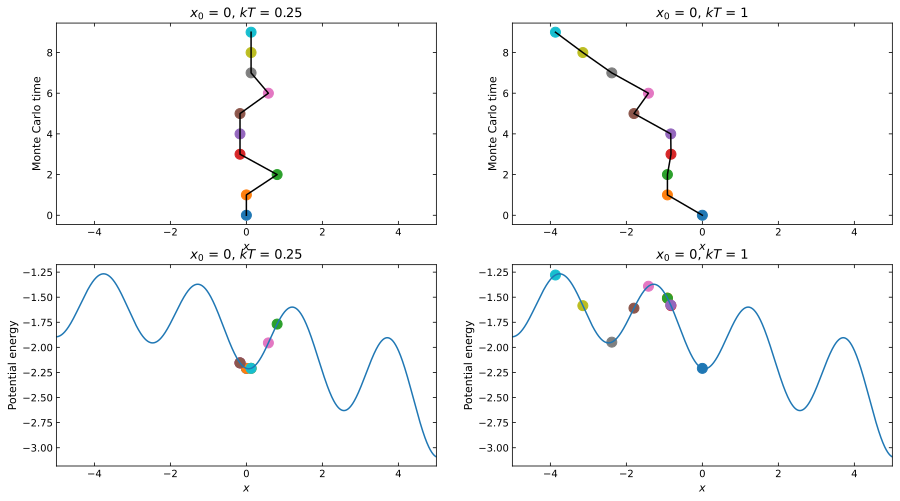

In [4]:
kTs = [0.25, 1]
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i, kT in enumerate(kTs):
    a = Atom(potential, kT=kT)
    a.search()
    a.plot_trajectory_steps(ax[0,i])
    a.plot_trajectory_landscape(ax[1,i])

fig.savefig('ex11_fig2.png')

In [5]:
# Animate the trajectory of 5 atoms in the potential starting at different values but with the same kT
x0s = [10, 30, 50, 70, 90]
V0s = [potential(x0) for x0 in x0s]
kT = 0.25
atoms = [Atom(potential, x0=x0, kT=kT) for x0 in x0s]

def update(i):
    for atom, scat in zip(atoms, scats):
        atom.step()
        x, V = atom.get_xy()
        scat.set_offsets([x, V])
    return scats

fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlabel=r"$x$", ylabel="Potential energy", title=fr"$kT$ = {kT}")

# Plot potential
xs = np.linspace(-10, 110, 1000)
ax.plot(xs, potential(xs))

# Animate
scats = [ax.scatter(x0, V0) for x0, V0 in zip(x0s, V0s)]
anim = animation.FuncAnimation(fig, update, frames=300, interval=50, blit=True)
plt.close()
anim

# Save the animation as a gif
anim.save('ex11_fig3.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


In [6]:
# Now for kT = 10. Everything else stays the same
kT = 20
atoms = [Atom(potential, x0=x0, kT=kT) for x0 in x0s]

fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlabel=r"$x$", ylabel="Potential energy", title=fr"$kT$ = {kT}")

# Plot potential
ax.plot(xs, potential(xs))

# Animate
scats = [ax.scatter(x0, V0) for x0, V0 in zip(x0s, V0s)]
anim = animation.FuncAnimation(fig, update, frames=300, interval=50, blit=True)
plt.close()
anim

# Save the animation as a gif
anim.save('ex11_fig4.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


In [7]:
a = Atom(potential, x0=55, kT=0.25)
a.get_required_steps(V_target=-4.75)

505